In [ ]:
import pandas as pd
df = pd.read_csv("/content/full_data_not_prepare.csv")

<ipython-input-5-69365e52f6d4>:2: DtypeWarning: Columns (4,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/full_data_not_prepare.csv")


In [ ]:
df.head(5)


,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,300.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,Mus musculus,Intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
3,ChEMBL,Br.CC(=O)c1ccc(NC(=O)CCN2CCN(c3ccc(Br)cn3)CC2)cc1,ADMET,Oral,3585.75,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,Mus musculus,Intraperitoneal,178.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN


In [ ]:
df.columns

Index(['Source', 'Smiles', 'Exp. Animal', 'Method of administration', 'LD50',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)'],
      dtype='object')

In [ ]:
df.shape

(171314, 22)

**1. Посмотреть на то, как часто встречаются метрики токсичности по каждому животному**

In [ ]:
table_pivot = pd.pivot_table(df,
               values=['LD50', 'Carcinogenicity', 'Hepatoxicity', 'Eye_Corrosion', 'Eye_Irritation', 'Mutagenicity', 'Respiratory_Toxicity','LC50', 'NOAEL'],
               index=['Exp. Animal'],
               aggfunc= ['count']
)
table_pivot

count                \
                                                Carcinogenicity Eye_Corrosion   
Exp. Animal                                                                     
ADMET                                                         0             0   
Dog                                                           0             0   
Guinea Pig                                                    0             0   
Hamster                                                       0             0   
Monkey                                                        0             0   
Mouse                                                       425          1387   
Mus musculus                                                  0             0   
Mus sp.                                                       0             0   
Rabbit                                                        0             0   
Rat                                                           0             0   
Rattus norvegicus                                             0             0   
bleak                                                         0             0   
bluegill                                                      0             0   
bluegill sunfish                                              0             0   
bobwhite quail                                                0             0   
carp                                                          0             0   
cat                                                           0             0   
channel catfish                                               0             0   
dog                                                           0             0   
dogs                                                          0             0   
earthworm                                                     0             0   
fathead minnow                                                0             0   
flatworm                                                      0             0   
frog                                                          0             0   
gammarus                                                      0             0   
goldfish                                                      0             0   
guinea pig                                                    0             0   
guppy                                                         0             0   
hamster                                                       0             0   
harpacticoid copepod                                          0             0   
inland silverside                                             0             0   
japanese quail                                                0             0   
mallard duck                                                  0             0   
medaka                                                        0             0   
mice                                                          0             0   
mosquitofish                                                  0             0   
mouse                                                         0             0   
oak toad                                                      0             0   
oncorhynchus mykiss (rainbow trout) weight 30 g               0             0   
orfe                                                          0             0   
quail                                                         0             0   
rabbit                                                        0             0   
rabbits                                                       0             0   
rat                                                           0             0   
rats                                                          0             0   
ring-necked pheasant                                          0             0   
sheepshead minnow                                             0             0   
shrimp  

**Выявлены проблемы:**


1.   Названия животных в разных регистрах
2.   Часть в множественном числе записана, часть - в единственном



In [ ]:
# перевод в один регистр
df['Exp. Animal']=df['Exp. Animal'].str.capitalize()

In [ ]:
# Названия животных к единственному числу
df['Exp. Animal']=df['Exp. Animal'].replace({'Rats':'Rat', 'Dogs': 'Dog', 'Rabbits': 'Rabbit', 'Mice': 'Mouse'})

In [ ]:
df['Exp. Animal'].unique()

array(['Mus musculus', 'Admet', 'Rattus norvegicus', 'Mus sp.', 'Rat',
       'Guinea pig', 'Mouse', 'Rabbit', nan, 'Dog', 'Hamster', 'Monkey',
       'Water flea', 'Shrimp', 'Gammarus', 'Harpacticoid copepod',
       'Fathead minnow', 'Medaka', 'Goldfish', 'Trout', 'Frog',
       'Mallard duck', 'Japanese quail', 'Ring-necked pheasant',
       'Bluegill', 'Cat', 'Orfe', 'Channel catfish', 'Guppy',
       'Bobwhite quail', 'Carp', 'Snail', 'Zebrafish', 'Bleak',
       'Sheepshead minnow', 'Inland silverside', 'Mosquitofish', 'Toad',
       'Quail', 'Oak toad', 'Bluegill sunfish', 'Tigriopus californicus',
       'Flatworm', 'Earthworm', 'Sprague-dawley rats',
       'Oncorhynchus mykiss (rainbow trout) weight 30 g'], dtype=object)

Проверяем еще раз распределение метрик по каждому животному с учетом проделанных корректировок в названиях.
**Проблема:** в уникальных значениях по Exp. Animal встречаются проблемы - будем избавляться на шаге чистки данных

In [ ]:
table_pivot = pd.pivot_table(df,
               values=['LD50', 'Carcinogenicity', 'Hepatoxicity', 'Eye_Corrosion', 'Eye_Irritation', 'Mutagenicity', 'Respiratory_Toxicity','LC50', 'NOAEL'],
               index=['Exp. Animal'],
               aggfunc= ['count']
)
table_pivot

count                \
                                                Carcinogenicity Eye_Corrosion   
Exp. Animal                                                                     
Admet                                                         0             0   
Bleak                                                         0             0   
Bluegill                                                      0             0   
Bluegill sunfish                                              0             0   
Bobwhite quail                                                0             0   
Carp                                                          0             0   
Cat                                                           0             0   
Channel catfish                                               0             0   
Dog                                                           0             0   
Earthworm                                                     0             0   
Fathead minnow                                                0             0   
Flatworm                                                      0             0   
Frog                                                          0             0   
Gammarus                                                      0             0   
Goldfish                                                      0             0   
Guinea pig                                                    0             0   
Guppy                                                         0             0   
Hamster                                                       0             0   
Harpacticoid copepod                                          0             0   
Inland silverside                                             0             0   
Japanese quail                                                0             0   
Mallard duck                                                  0             0   
Medaka                                                        0             0   
Monkey                                                        0             0   
Mosquitofish                                                  0             0   
Mouse                                                       425          1387   
Mus musculus                                                  0             0   
Mus sp.                                                       0             0   
Oak toad                                                      0             0   
Oncorhynchus mykiss (rainbow trout) weight 30 g               0             0   
Orfe                                                          0             0   
Quail                                                         0             0   
Rabbit                                                        0             0   
Rat                                                           0             0   
Rattus norvegicus                                             0             0   
Ring-necked pheasant                                          0             0   
Sheepshead minnow                                             0             0   
Shrimp                                                        0             0   
Snail                                                         0             0   
Sprague-dawley rats                                           0             0   
Tigriopus californicus                                        0             0   
Toad                                                          0             0   
Trout                                                         0             0   
Water flea                                                    0             0   
Zebrafish                                                     0             0   

                                                                             \
                                                Eye_Irritation Hepatoxicity   
Exp. Animal

**Вывод:**
Судя по сводной таблицы наибольшее количесто значений метрик токсичности определяется на животных: Rabbit, Mouse, Rat, Guinea pig

**2. Чистим от дубликатов**

In [ ]:
# находим полные дубликаты по всем столбцам и удаляем их
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

         Source                                             Smiles  \
3890    CompTox  CC1=C(C=CC(=C1)NC2=NC(=NC(=N2)NCCO)NC3=CC(=C(C...   
3912    CompTox                   CC[N+](CC)(CC)CC1=CC=CC=C1.[Cl-]   
3936    CompTox                        CC(C)NNCS(=O)(=O)[O-].[Na+]   
3984    CompTox                                 C1COCCN1SSN2CCOCC2   
4000    CompTox          C1=CC(=CC=C1C(=C(Cl)Cl)C2=CC=C(C=C2)Cl)Cl   
...         ...                                                ...   
171307  PubChem  C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...   
171308  PubChem  C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...   
171309  PubChem  C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...   
171310  PubChem  C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...   
171311  PubChem  COCCNC(=O)CN(CCN(CCN(CC(=O)NCCOC)CC(=O)[O-])CC...   

       Exp. Animal Method of administration      LD50 LD50 (a.u.)  \
3890           Rat                     oral       203       mg/kg   
3912           Rat   

In [ ]:
#удаление полных дубликатов
df1 = df.drop_duplicates()

In [ ]:
df1.shape

(169703, 22)

In [ ]:
#удаление пустых строчек по названию животного (не несут никакой информации)
df1 = df1.dropna(subset=['Exp. Animal'])

In [ ]:
df1.shape

(157935, 22)

Сократим датасет, оставив только часто встречающихся животных

In [ ]:
df1 = df1[(df1['Exp. Animal'] == 'Rabbit') | (df1['Exp. Animal'] == 'Rat') | (df1['Exp. Animal'] == 'Mouse') | (df1['Exp. Animal'] == 'Guinea pig')]

In [ ]:
df1.shape

(150403, 22)

In [ ]:
df1.columns

Index(['Source', 'Smiles', 'Exp. Animal', 'Method of administration', 'LD50',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)'],
      dtype='object')

In [ ]:
#удаление дубликатов без учета источника
df1 = df1.drop_duplicates(subset=['Smiles', 'Exp. Animal', 'Method of administration', 'LD50',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)'], keep = 'first')


In [ ]:
df1.shape

(148422, 22)

Значения по LD50 часто записаны с запятой, надо исправить
Поработаем пока с ними

In [ ]:
df1['LD50'] = df1['LD50'].str.replace(',', '.')

In [ ]:
#df1.to_excel('gdd.xlsx', index=False)

In [ ]:
import pandas as pd
#df1 = pd.read_excel("/content/gdd.xlsx")

In [ ]:
df1['LD50'] = df1['LD50'].astype(float)

In [ ]:
def scatter_plot(df, x, y, title, name_x, name_y):
  plt.figure(figsize=(10, 10))
  plt.title(title)
  plt.scatter(df[x], df[y])
  plt.xlabel(name_x)
  plt.ylabel(name_y)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt

<Axes: >

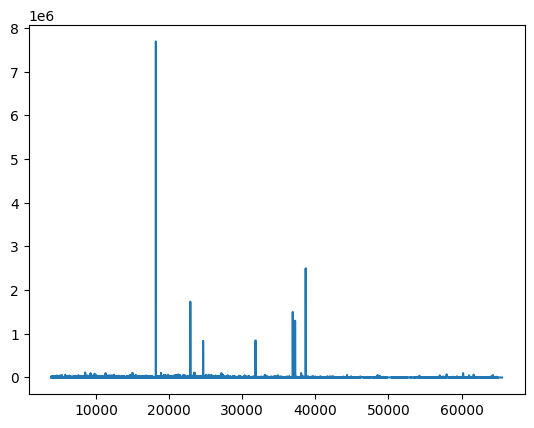

In [ ]:
df1['LD50'].plot()

<Axes: >

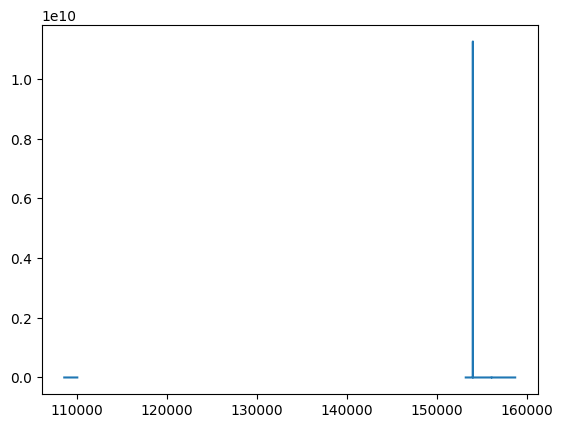

In [ ]:
df1['LC50'].plot()

<Axes: >

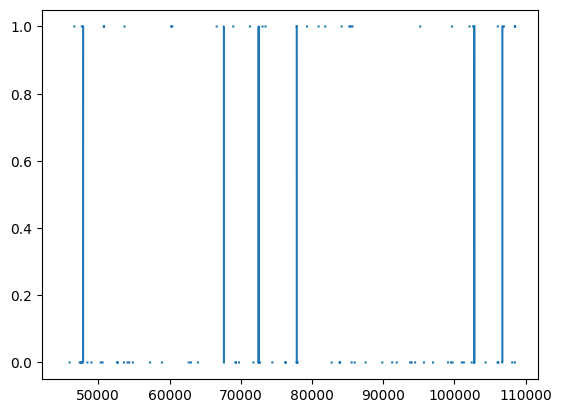

In [ ]:
df1['Carcinogenicity'].plot()

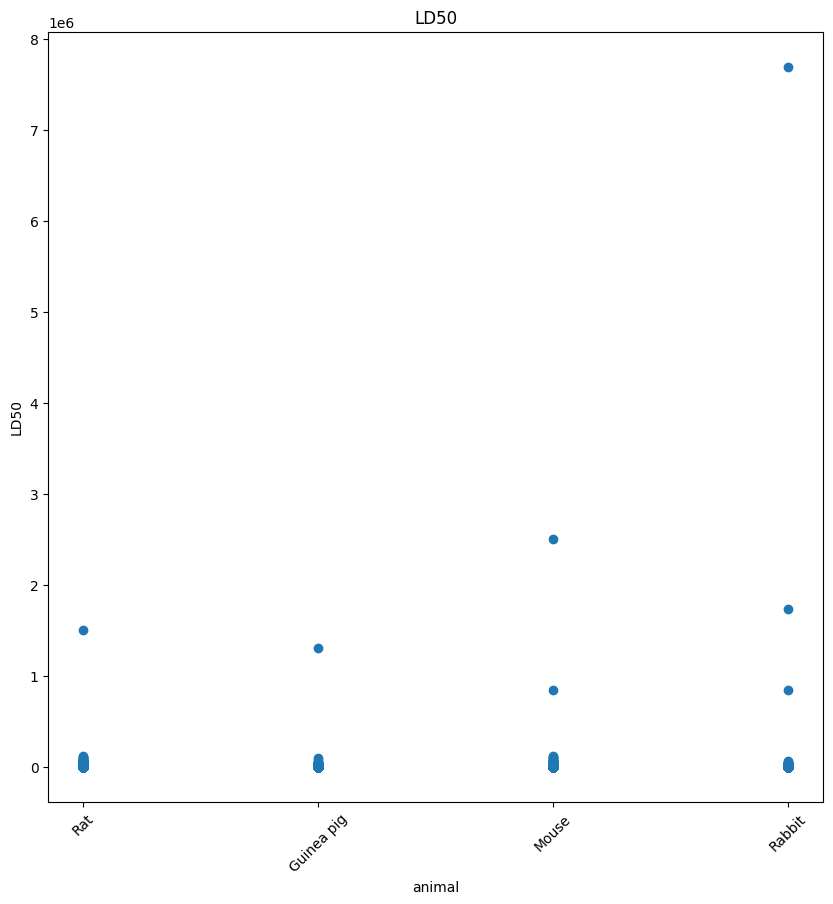

In [ ]:
scatter_plot(df1, 'Exp. Animal', 'LD50', 'LD50', 'animal', 'LD50')

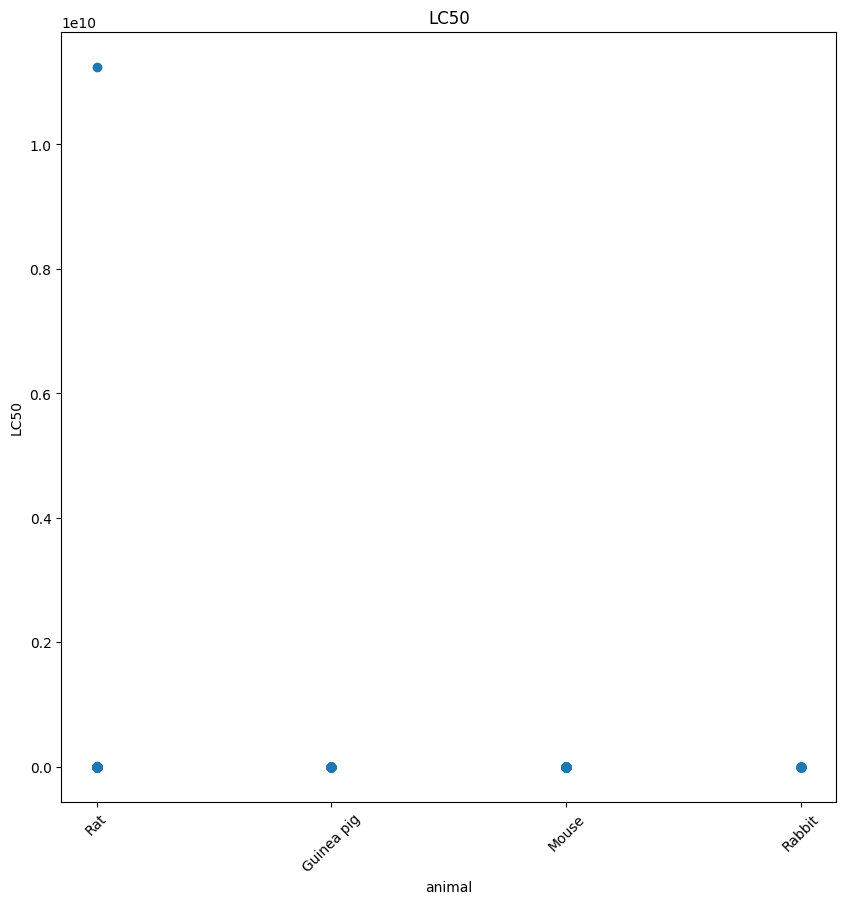

In [ ]:
scatter_plot(df1, 'Exp. Animal', 'LC50', 'LC50', 'animal', 'LC50')

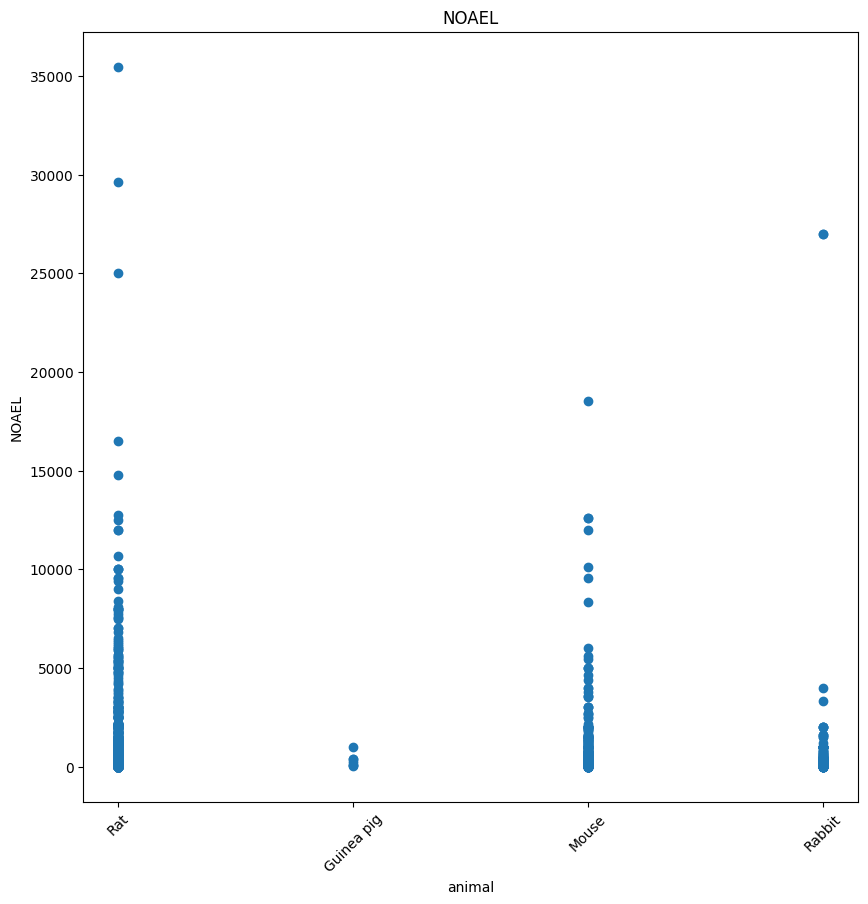

In [ ]:
scatter_plot(df1, 'Exp. Animal', 'NOAEL', 'NOAEL', 'animal', 'NOAEL')

In [ ]:
# полные дубликаты, за исключением значений метрики LD50
df2 = df1[df1.duplicated(subset=['Smiles', 'Exp. Animal', 'Method of administration',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)'])]

In [ ]:
df2

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
4034,CompTox,CC(C)(C)OC(=O)N1CC2(CC2)CC1C(=O)O,Rat,oral,11800.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4043,CompTox,CC(C)(C)OC(=O)N1CC2(CC2)CC1C(=O)O,Rat,oral,2900.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4209,CompTox,CC(C)CCC(C)C(C)O,Rat,oral,12000.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4396,CompTox,C1=CC2=C(C(=C(C=C2C=C1NC3=NC(=NC(=N3)NCCO)NC4=...,Rat,oral,245.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
4508,CompTox,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OC2=C([C@...,Rat,oral,20200.0,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170957,PubChem,CCC/C(=N\OCC)/C1=C(CC(CC1=O)CC(C)SCC)O,Rat,dermal,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
170960,PubChem,CC/C(=N\OCC)/C1=C(CC(CC1=O)C2=C(C=C(C=C2C)C)C)O,Rat,oral,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
170962,PubChem,CC/C(=N\OCC)/C1=C(CC(CC1=O)C2=C(C=C(C=C2C)C)C)O,Mouse,oral,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
170968,PubChem,COC(=O)N/N=C/C1=[N+](C2=CC=CC=C2[N+](=C1)[O-])...,Rat,oral,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN


In [ ]:
t = df2.iloc[78]['Smiles']
t

'CCCCCCCCCC1=CC=C(C=C1)OCCO'

In [ ]:
df2 = df2[df2['Smiles']== t]

In [ ]:
df2 = duplicates.dropna(subset=['LD50'])

In [ ]:
df2

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,Mutagenicity (a.u.),Respiratory_Toxicity,Respiratory_Toxicity (a.u.),LC50,LC50 (a.u.),NOAEL,NOAEL (a.u)
3973,CompTox,C(#CC#N)C#N,Rat,oral,441,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
17879,CompTox,C(#CC#N)C#N,Mouse,oral,526,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
110264,toxval,C(#CC#N)C#N,Mouse,oral,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN
110265,toxval,C(#CC#N)C#N,Rat,oral,NaN,mg/kg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg/L,NaN,NaN


In [ ]:
df1.iloc[17879]

,21909
Source,CompTox
Smiles,C(#N)N
Exp. Animal,Mouse
Method of administration,oral
LD50,388.0
LD50 (a.u.),mg/kg
Carcinogenicity,NaN
Carcinogenicity (a.u.),NaN
Hepatoxicity,NaN
Hepatoxicity (a.u.),NaN


Необходимо почистить значения по датасету в части частичных дубликатов с разными значениями по метрике LD50 или проппуками в ней